<img src="https://miro.medium.com/max/450/0*KYIdwOJU-OGNX7vG" alt="edWisor">

# PROJECT : CAB FARE PREDICTION

### Candidate name : Kuldeep Sharma.R

### Problem Statement -
              You are a cab rental start-up company. You have successfully run the pilot project and now want to launch your cab service across the country.You have collected the historical data from your pilot project and now have a requirement to apply analytics for fare prediction. You need to design a system that predicts the fare amount for a cab ride in the city.

>### Number of attributes:
1. **Pickup_datetime**    -timestamp value indicating when the cab ride started.
2. **Pickup_longitude**   - float for longitude coordinate of where the cab ride started.
3. **Pickup_latitude**    - float for latitude coordinate of where the cab ride started.
4. **Dropoff_longitude**  - float for longitude coordinate of where the cab ride ended.
5. **Dropoff_latitude**   - float for latitude coordinate of where the cab ride ended.
6. **Passenger_count**    - an integer indicating the number of passengers in the cab ride.

### Importing the File

In [1]:
import pandas as pd

df = pd.read_csv("train_cab.csv")
df.head()

,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,4.5,2009-06-15 17:26:21 UTC,-73.844311,40.721319,-73.841610,40.712278,1.0
1,16.9,2010-01-05 16:52:16 UTC,-74.016048,40.711303,-73.979268,40.782004,1.0
2,5.7,2011-08-18 00:35:00 UTC,-73.982738,40.761270,-73.991242,40.750562,2.0
3,7.7,2012-04-21 04:30:42 UTC,-73.987130,40.733143,-73.991567,40.758092,1.0
4,5.3,2010-03-09 07:51:00 UTC,-73.968095,40.768008,-73.956655,40.783762,1.0


In [2]:
df_test=pd.read_csv("test.csv")
df_test.head()

,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,2015-01-27 13:08:24 UTC,-73.973320,40.763805,-73.981430,40.743835,1
1,2015-01-27 13:08:24 UTC,-73.986862,40.719383,-73.998886,40.739201,1
2,2011-10-08 11:53:44 UTC,-73.982524,40.751260,-73.979654,40.746139,1
3,2012-12-01 21:12:12 UTC,-73.981160,40.767807,-73.990448,40.751635,1
4,2012-12-01 21:12:12 UTC,-73.966046,40.789775,-73.988565,40.744427,1


In [3]:
print(df.info)
print(df_test.info)

<bound method DataFrame.info of       fare_amount          pickup_datetime  pickup_longitude  pickup_latitude  \
0             4.5  2009-06-15 17:26:21 UTC        -73.844311        40.721319   
1            16.9  2010-01-05 16:52:16 UTC        -74.016048        40.711303   
2             5.7  2011-08-18 00:35:00 UTC        -73.982738        40.761270   
3             7.7  2012-04-21 04:30:42 UTC        -73.987130        40.733143   
4             5.3  2010-03-09 07:51:00 UTC        -73.968095        40.768008   
...           ...                      ...               ...              ...   
16062         6.5  2014-12-12 07:41:00 UTC        -74.008820        40.718757   
16063        16.1  2009-07-13 07:58:00 UTC        -73.981310        40.781695   
16064         8.5  2009-11-11 11:19:07 UTC        -73.972507        40.753417   
16065         8.1  2010-05-11 23:53:00 UTC        -73.957027        40.765945   
16066         8.5  2011-12-14 06:24:33 UTC        -74.002111        40.729755

In [4]:
df.describe()

,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
count,16067.000000,16067.000000,16067.000000,16067.000000,16012.000000
mean,-72.462787,39.914725,-72.462328,39.897906,2.625070
std,10.578384,6.826587,10.575062,6.187087,60.844122
min,-74.438233,-74.006893,-74.429332,-74.006377,0.000000
25%,-73.992156,40.734927,-73.991182,40.734651,1.000000
50%,-73.981698,40.752603,-73.980172,40.753567,1.000000
75%,-73.966838,40.767381,-73.963643,40.768013,2.000000
max,40.766125,401.083332,40.802437,41.366138,5345.000000


In [5]:
df_test.describe()

,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
count,9914.000000,9914.000000,9914.000000,9914.000000,9914.000000
mean,-73.974722,40.751041,-73.973657,40.751743,1.671273
std,0.042774,0.033541,0.039072,0.035435,1.278747
min,-74.252193,40.573143,-74.263242,40.568973,1.000000
25%,-73.992501,40.736125,-73.991247,40.735254,1.000000
50%,-73.982326,40.753051,-73.980015,40.754065,1.000000
75%,-73.968013,40.767113,-73.964059,40.768757,2.000000
max,-72.986532,41.709555,-72.990963,41.696683,6.000000


## Feature Engineering

### Transforming the Date & time of the customer pickup datetime to usable case

In [6]:
import datetime

In [7]:
pd.to_datetime(df['pickup_datetime'],errors='coerce')

0       2009-06-15 17:26:21+00:00
1       2010-01-05 16:52:16+00:00
2       2011-08-18 00:35:00+00:00
3       2012-04-21 04:30:42+00:00
4       2010-03-09 07:51:00+00:00
                   ...           
16062   2014-12-12 07:41:00+00:00
16063   2009-07-13 07:58:00+00:00
16064   2009-11-11 11:19:07+00:00
16065   2010-05-11 23:53:00+00:00
16066   2011-12-14 06:24:33+00:00
Name: pickup_datetime, Length: 16067, dtype: datetime64[ns, UTC]

In [8]:
df['pickup_datetime']=pd.to_datetime(df['pickup_datetime'],errors='coerce')

In [9]:
df['pickup_datetime'].dt.month

0         6.0
1         1.0
2         8.0
3         4.0
4         3.0
         ... 
16062    12.0
16063     7.0
16064    11.0
16065     5.0
16066    12.0
Name: pickup_datetime, Length: 16067, dtype: float64

##### Creating usable features using datetime data

In [10]:
df['year']=df['pickup_datetime'].dt.year
df['month']=df['pickup_datetime'].dt.month
df['day']=df['pickup_datetime'].dt.day
df['hour']=df['pickup_datetime'].dt.hour
df['minute']=df['pickup_datetime'].dt.minute

In [11]:
df.head()

,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,year,month,day,hour,minute
0,4.5,2009-06-15 17:26:21+00:00,-73.844311,40.721319,-73.841610,40.712278,1.0,2009.0,6.0,15.0,17.0,26.0
1,16.9,2010-01-05 16:52:16+00:00,-74.016048,40.711303,-73.979268,40.782004,1.0,2010.0,1.0,5.0,16.0,52.0
2,5.7,2011-08-18 00:35:00+00:00,-73.982738,40.761270,-73.991242,40.750562,2.0,2011.0,8.0,18.0,0.0,35.0
3,7.7,2012-04-21 04:30:42+00:00,-73.987130,40.733143,-73.991567,40.758092,1.0,2012.0,4.0,21.0,4.0,30.0
4,5.3,2010-03-09 07:51:00+00:00,-73.968095,40.768008,-73.956655,40.783762,1.0,2010.0,3.0,9.0,7.0,51.0


In [12]:
import numpy as np

In [13]:
##Taking shift 0&1 as the AM & PM respectively.
df['shift']=np.where(df['hour']<12,0,1)

In [14]:
df.drop('pickup_datetime',axis=1,inplace=True)
df.head()

,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,year,month,day,hour,minute,shift
0,4.5,-73.844311,40.721319,-73.841610,40.712278,1.0,2009.0,6.0,15.0,17.0,26.0,1
1,16.9,-74.016048,40.711303,-73.979268,40.782004,1.0,2010.0,1.0,5.0,16.0,52.0,1
2,5.7,-73.982738,40.761270,-73.991242,40.750562,2.0,2011.0,8.0,18.0,0.0,35.0,0
3,7.7,-73.987130,40.733143,-73.991567,40.758092,1.0,2012.0,4.0,21.0,4.0,30.0,0
4,5.3,-73.968095,40.768008,-73.956655,40.783762,1.0,2010.0,3.0,9.0,7.0,51.0,0


### Calculating the distance travelled by the cab using Haversince distance method, Since geograhical distance is given

In [15]:
# for distance travelled by cab, Calculating haversine distance

def haversine(df):
    """
    Calculate the great circle distance between two points 
    on the earth (specified in decimal degrees)
    """
    lat1= np.radians(df["pickup_latitude"])
    lat2 = np.radians(df["dropoff_latitude"])
    #### Based on the formula  x1=drop_lat,x2=dropoff_long 
    dlat = np.radians(df['dropoff_latitude']-df["pickup_latitude"])
    dlong = np.radians(df["dropoff_longitude"]-df["pickup_longitude"])
    a = np.sin(dlat/2)**2 + np.cos(lat1) * np.cos(lat2) * np.sin(dlong/2)**2

    c = 2 * np.arctan2(np.sqrt(a), np.sqrt(1-a))
    r = 6371 # Radius of earth in kilometers.
    return c * r

In [16]:
df['total_distance']=haversine(df)

In [17]:
df.head()

,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,year,month,day,hour,minute,shift,total_distance
0,4.5,-73.844311,40.721319,-73.841610,40.712278,1.0,2009.0,6.0,15.0,17.0,26.0,1,1.030764
1,16.9,-74.016048,40.711303,-73.979268,40.782004,1.0,2010.0,1.0,5.0,16.0,52.0,1,8.450134
2,5.7,-73.982738,40.761270,-73.991242,40.750562,2.0,2011.0,8.0,18.0,0.0,35.0,0,1.389525
3,7.7,-73.987130,40.733143,-73.991567,40.758092,1.0,2012.0,4.0,21.0,4.0,30.0,0,2.799270
4,5.3,-73.968095,40.768008,-73.956655,40.783762,1.0,2010.0,3.0,9.0,7.0,51.0,0,1.999157


In [18]:
# Since the Distance is calculated, latitude& longitude values are not required, son dropping them

df.drop(['pickup_longitude','pickup_latitude','dropoff_longitude','dropoff_latitude'],axis=1,inplace=True)

In [19]:
df.head()

,fare_amount,passenger_count,year,month,day,hour,minute,shift,total_distance
0,4.5,1.0,2009.0,6.0,15.0,17.0,26.0,1,1.030764
1,16.9,1.0,2010.0,1.0,5.0,16.0,52.0,1,8.450134
2,5.7,2.0,2011.0,8.0,18.0,0.0,35.0,0,1.389525
3,7.7,1.0,2012.0,4.0,21.0,4.0,30.0,0,2.799270
4,5.3,1.0,2010.0,3.0,9.0,7.0,51.0,0,1.999157


In [20]:
# Doing the Same for test data set

# Transforming to datetime
df_test['pickup_datetime']=pd.to_datetime(df_test['pickup_datetime'],errors='coerce')

# Creating usable features from datetime
df_test['year']=df_test['pickup_datetime'].dt.year
df_test['month']=df_test['pickup_datetime'].dt.month
df_test['day']=df_test['pickup_datetime'].dt.day
df_test['hour']=df_test['pickup_datetime'].dt.hour
df_test['minute']=df_test['pickup_datetime'].dt.minute

# Since Cab availability depends on time of the day, creating a feature to navigate AM & PM as 0 & 1 respectively
df_test['shift']=np.where(df_test['hour']<12,0,1)

# Applying the haversine distance method to calculate distance of cab travelled using its geographical locations
df_test['total_distance']=haversine(df_test)

# Dropping the features which are not gonna be in use from here
df_test.drop(['pickup_datetime','pickup_longitude','pickup_latitude','dropoff_longitude','dropoff_latitude'],axis=1,inplace=True)

df_test.head()

,passenger_count,year,month,day,hour,minute,shift,total_distance
0,1,2015,1,27,13,8,1,2.323259
1,1,2015,1,27,13,8,1,2.425353
2,1,2011,10,8,11,53,0,0.618628
3,1,2012,12,1,21,12,1,1.961033
4,1,2012,12,1,21,12,1,5.387301


In [21]:
print(df.dtypes)
df_test.dtypes

fare_amount         object
passenger_count    float64
year               float64
month              float64
day                float64
hour               float64
minute             float64
shift                int32
total_distance     float64
dtype: object


passenger_count      int64
year                 int64
month                int64
day                  int64
hour                 int64
minute               int64
shift                int32
total_distance     float64
dtype: object

In [22]:
# Since data type of fare_amount given as object which can't be, so converting it into float

df["fare_amount"]=pd.to_numeric(df["fare_amount"],errors='coerce')
df["fare_amount"].dtype

dtype('float64')

In [23]:
df.shape

(16067, 9)

## Exploratory Data Analysis

### Checking missing values & Handling them

In [24]:
df.isnull().sum()

fare_amount        25
passenger_count    55
year                1
month               1
day                 1
hour                1
minute              1
shift               0
total_distance      0
dtype: int64

In [25]:
variable=['fare_amount']#,'passenger_count','year','month','day','hour','minute']
for median in df[variable]:
    print(df[variable].median())

fare_amount    8.5
dtype: float64


In [26]:
df.median()

fare_amount           8.500000
passenger_count       1.000000
year               2012.000000
month                 6.000000
day                  16.000000
hour                 14.000000
minute               30.000000
shift                 1.000000
total_distance        2.125326
dtype: float64

In [27]:
df['fare_amount'].fillna(df['fare_amount'].median(),inplace=True)
df['passenger_count'].fillna(df['passenger_count'].median(),inplace=True)
df['year'].fillna(df['year'].median(),inplace=True)
df['month'].fillna(df['month'].median(),inplace=True)
df['day'].fillna(df['day'].median(),inplace=True)
df['hour'].fillna(df['hour'].median(),inplace=True)
df['minute'].fillna(df['minute'].median(),inplace=True)

In [28]:
print(df.shape)
df.isnull().sum()

(16067, 9)


fare_amount        0
passenger_count    0
year               0
month              0
day                0
hour               0
minute             0
shift              0
total_distance     0
dtype: int64

**Finding No.of Passengers Rode the cab**

In [29]:
#Since the passenger_count cant be in Decimal
df["passenger_count"]=np.ceil(df["passenger_count"])
df["passenger_count"].value_counts()

1.0       11315
2.0        2323
5.0        1045
3.0         676
4.0         329
6.0         302
0.0          57
53.0          2
43.0          2
58.0          1
345.0         1
456.0         1
354.0         1
87.0          1
55.0          1
532.0         1
535.0         1
536.0         1
537.0         1
554.0         1
5334.0        1
35.0          1
5345.0        1
557.0         1
236.0         1
Name: passenger_count, dtype: int64

### Since In a Cab Passengers can't be more than 6 people, Finding Passengers more than 6 people

In [30]:
(df["passenger_count"]>6).value_counts()

False    16047
True        20
Name: passenger_count, dtype: int64

### Replacing these Outlier values greater than 6 passenger_count with median

In [31]:
df.drop(df[df['passenger_count']>6].index,inplace=True)

In [32]:
df.shape

(16047, 9)

In [33]:
df.head()

,fare_amount,passenger_count,year,month,day,hour,minute,shift,total_distance
0,4.5,1.0,2009.0,6.0,15.0,17.0,26.0,1,1.030764
1,16.9,1.0,2010.0,1.0,5.0,16.0,52.0,1,8.450134
2,5.7,2.0,2011.0,8.0,18.0,0.0,35.0,0,1.389525
3,7.7,1.0,2012.0,4.0,21.0,4.0,30.0,0,2.799270
4,5.3,1.0,2010.0,3.0,9.0,7.0,51.0,0,1.999157


### Checking if the Fare amount is less than "Zero" - which is not possible

In [34]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

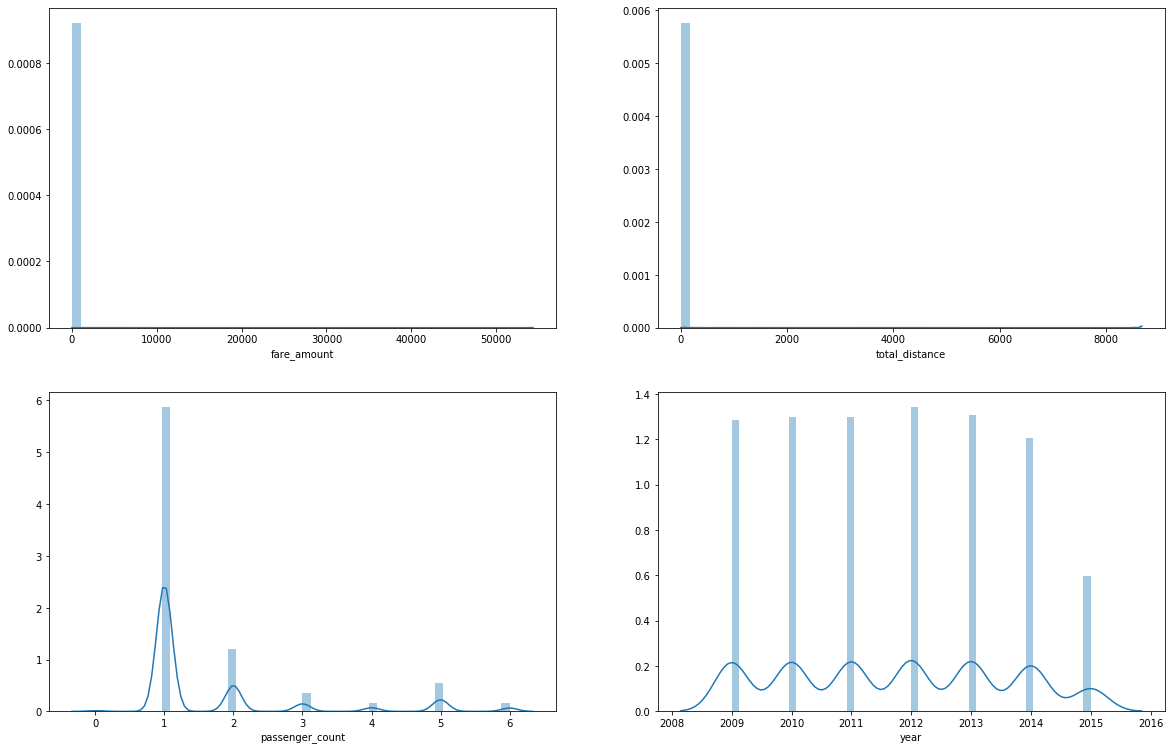

In [35]:
plt.figure(figsize=(20,20))
plt.subplot(321)
sns.distplot(df['fare_amount'],bins=50)
plt.subplot(322)
sns.distplot(df['total_distance'],bins=50)
plt.subplot(323)
sns.distplot(df['passenger_count'],bins=50)
plt.subplot(324)
sns.distplot(df['year'],bins=50)
# plt.savefig('hist.png')
plt.show()

### The Distribution is Right skewed with outliers present in it, therefore lets handle the outliers

##### --> Handling outliers in Fare amount of the cab

##### Copying original dataset to perform outlier treatment (This will we useful for Linear  models & Neural Networks)

In [36]:
df1=df.copy()
df1.head()

,fare_amount,passenger_count,year,month,day,hour,minute,shift,total_distance
0,4.5,1.0,2009.0,6.0,15.0,17.0,26.0,1,1.030764
1,16.9,1.0,2010.0,1.0,5.0,16.0,52.0,1,8.450134
2,5.7,2.0,2011.0,8.0,18.0,0.0,35.0,0,1.389525
3,7.7,1.0,2012.0,4.0,21.0,4.0,30.0,0,2.799270
4,5.3,1.0,2010.0,3.0,9.0,7.0,51.0,0,1.999157


In [37]:
df1.fare_amount.describe()

count    16047.000000
mean        15.013510
std        430.393861
min         -3.000000
25%          6.000000
50%          8.500000
75%         12.500000
max      54343.000000
Name: fare_amount, dtype: float64

##### Finding InterQuantile range for fare amount charged for passengers

In [38]:
# Calculating InterQuantile range to know boundaries
IQR=df1.fare_amount.quantile(0.75)-df1.fare_amount.quantile(0.25)
print('InterQuantile Range  : {}'.format(IQR))

# computing outlier
upper_bridge_fare=df1.fare_amount.quantile(0.75)+(1.5*IQR)
lower_bridge_fare=df1.fare_amount.quantile(0.25)-(1.5*IQR)
print('upper bridge         : {}'.format(upper_bridge_fare))
print('lower bridge         : {}'.format(lower_bridge_fare))

# Computing Extreme Outlier
ext_upper_bridge_fare=df1.fare_amount.quantile(0.75)+(3*IQR)
ext_lower_bridge_fare=df1.fare_amount.quantile(0.25)-(3*IQR)
print('Extreme upper bridge : {}'.format(ext_upper_bridge_fare))
print('Extreme lower bridge : {}'.format(ext_lower_bridge_fare))

InterQuantile Range  : 6.5
upper bridge         : 22.25
lower bridge         : -3.75
Extreme upper bridge : 32.0
Extreme lower bridge : -13.5


### Since the Extreme lower bridge for fare amount charged for passenger is 32, considering all other values greater than that as outlier

In [39]:
print((df1['fare_amount']>ext_upper_bridge_fare).value_counts())

# Also the fare charged cant be negative
(df1['fare_amount']<0).value_counts()

False    15339
True       708
Name: fare_amount, dtype: int64


False    16044
True         3
Name: fare_amount, dtype: int64

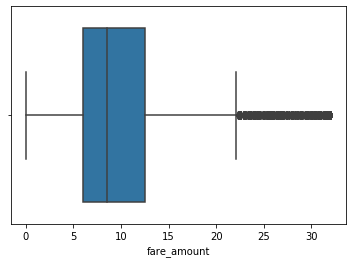

In [40]:
# df1.drop(df1[df1['fare_amount']>ext_upper_bridge_fare].index,inplace=True)
df1.loc[df1['fare_amount']>ext_upper_bridge_fare,'fare_amount']=ext_upper_bridge_fare
df1.drop(df1[df1['fare_amount']<0].index,inplace=True)
# df1.loc[df['fare_amount']>=32,'fare_amount']=32

# Re-checking the whether fare amount is greater than 32
sns.boxplot(df1['fare_amount'])

In [41]:
(df1['fare_amount']>ext_upper_bridge_fare).value_counts()

False    16044
Name: fare_amount, dtype: int64

In [42]:
# Calculating InterQuantile range to know boundaries
IQR=df1.total_distance.quantile(0.75)-df.total_distance.quantile(0.25)
print('InterQuantile Range  : {}'.format(IQR))

# computing outlier
upper_bridge_dist=df1.total_distance.quantile(0.75)+(1.5*IQR)
lower_bridge_dist=df1.total_distance.quantile(0.25)-(1.5*IQR)
print('upper bridge         : {}'.format(upper_bridge_dist))
print('lower bridge         : {}'.format(lower_bridge_dist))

# Computing Extreme Outlier
ext_upper_bridge_dist=df1.total_distance.quantile(0.75)+(3*IQR)
ext_lower_bridge_dist=df1.total_distance.quantile(0.25)-(3*IQR)
print('Extreme upper bridge : {}'.format(ext_upper_bridge_dist))
print('Extreme lower bridge : {}'.format(ext_lower_bridge_dist))

InterQuantile Range  : 2.640579722925032
upper bridge         : 7.816274629341524
lower bridge         : -2.745060184034496
Extreme upper bridge : 11.777144213729072
Extreme lower bridge : -6.705929768422044


### Choosing The Extreme outlier for the Outliers

In [43]:
# Since the Extreme boundries with IQR provides a limit after which if values located we can consider as Outlier
print((df1['total_distance']>ext_upper_bridge_dist).value_counts())

# Also the distance charged cant be negative
(df1['total_distance']<0).value_counts()

False    15428
True       616
Name: total_distance, dtype: int64


False    16044
Name: total_distance, dtype: int64

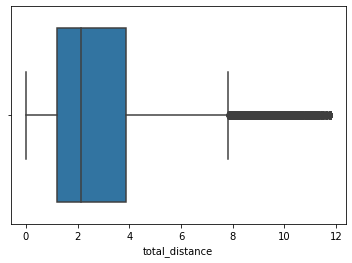

In [44]:
# df1.drop(df1[df1['total_distance']>ext_upper_bridge_dist].index,inplace=True)

df1.loc[df1['total_distance']>ext_upper_bridge_dist,'total_distance']=ext_upper_bridge_dist
# df.drop(df[df['total_distance']<0].index,inplace=True)

# Re-checking the whether fare amount is greater than 32
sns.boxplot(df1['total_distance'])

In [45]:
(df1['total_distance']>ext_upper_bridge_dist).value_counts()

False    16044
Name: total_distance, dtype: int64

### Correlation

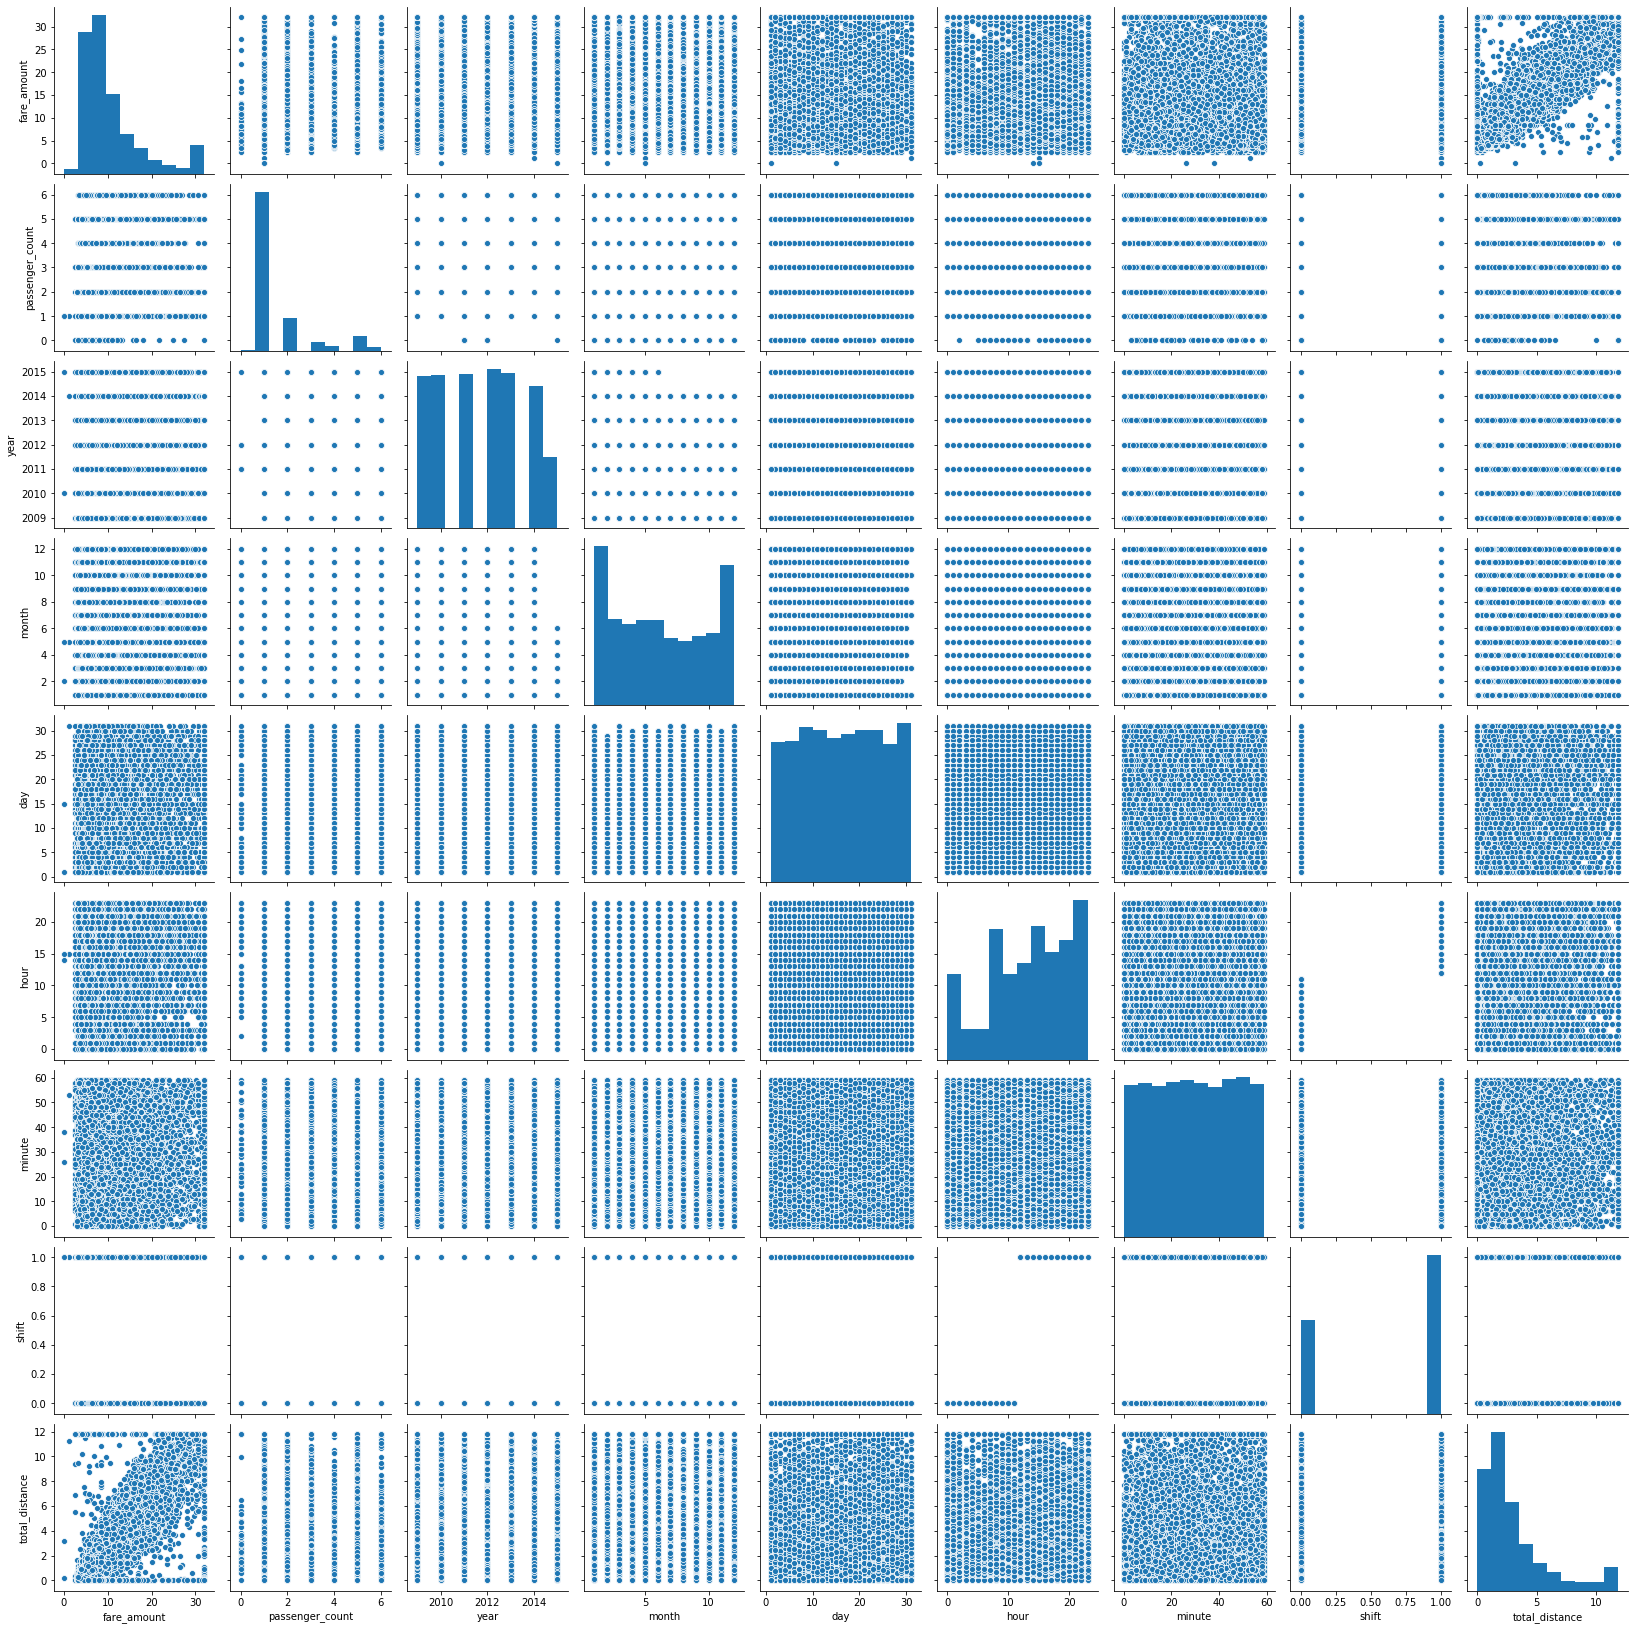

In [46]:
sns.pairplot(df1)

In [47]:
# Get correlation o0f each features in dataset
corrmat = df1.corr()
print(corrmat.index)
corrmat

Index(['fare_amount', 'passenger_count', 'year', 'month', 'day', 'hour',
       'minute', 'shift', 'total_distance'],
      dtype='object')


,fare_amount,passenger_count,year,month,day,hour,minute,shift,total_distance
fare_amount,1.000000,0.014301,0.130614,0.037926,-0.006683,-0.033511,-0.020102,-0.013764,0.853528
passenger_count,0.014301,1.000000,0.003414,0.012219,0.002234,0.017576,-0.017448,0.025716,0.006220
year,0.130614,0.003414,1.000000,-0.116960,-0.026772,-0.004687,-0.004545,-0.004341,0.024201
month,0.037926,0.012219,-0.116960,1.000000,-0.015304,-0.005006,-0.006185,0.000028,0.021269
day,-0.006683,0.002234,-0.026772,-0.015304,1.000000,-0.001581,-0.000735,-0.001647,-0.003236
hour,-0.033511,0.017576,-0.004687,-0.005006,-0.001581,1.000000,-0.002136,0.841886,-0.048482
minute,-0.020102,-0.017448,-0.004545,-0.006185,-0.000735,-0.002136,1.000000,-0.008611,-0.018246
shift,-0.013764,0.025716,-0.004341,0.000028,-0.001647,0.841886,-0.008611,1.000000,-0.038696
total_distance,0.853528,0.006220,0.024201,0.021269,-0.003236,-0.048482,-0.018246,-0.038696,1.000000


### Correlation with Heat Map

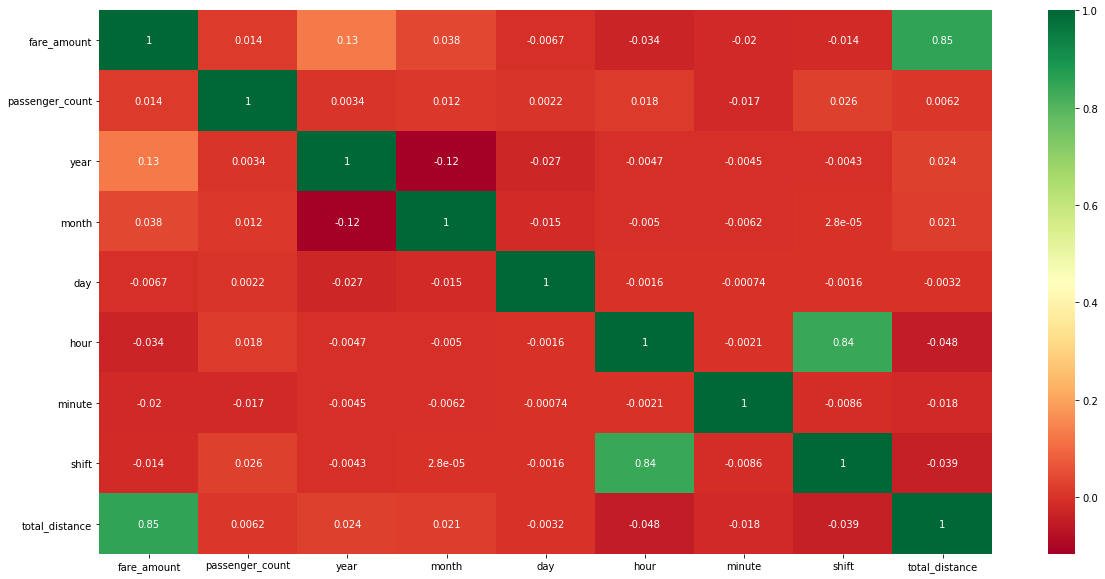

In [48]:
top_corr_features = corrmat.index

plt.figure(figsize=(20,10))

# Plot Heatmap
g=sns.heatmap(df1[top_corr_features].corr(),annot=True,cmap='RdYlGn')

In [49]:
df1.shape

(16044, 9)

## Feature Importance

In [50]:
X=df1.iloc[:,1:] # Independent Features
y=df1.iloc[:,0]  # Dependent Features

In [51]:
# Feature Importance using ExtraTreesRegressor Module
from sklearn.ensemble import ExtraTreesRegressor

In [52]:
select_feature=ExtraTreesRegressor()
select_feature.fit(X,y)

ExtraTreesRegressor()

In [53]:
select_feature.feature_importances_

array([0.01829936, 0.03576726, 0.03580584, 0.03640491, 0.03868238,
       0.03833664, 0.00708815, 0.78961545])

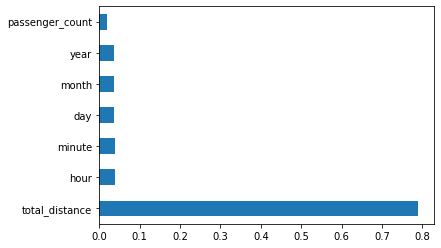

In [54]:
#plot graph of feature importances for better visualization
feat_importances = pd.Series(select_feature.feature_importances_, index=X.columns)
feat_importances.nlargest(7).plot(kind='barh')
plt.show()

## Machine Learning

### Train-Test-split for train & test dataset

In [55]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=100)

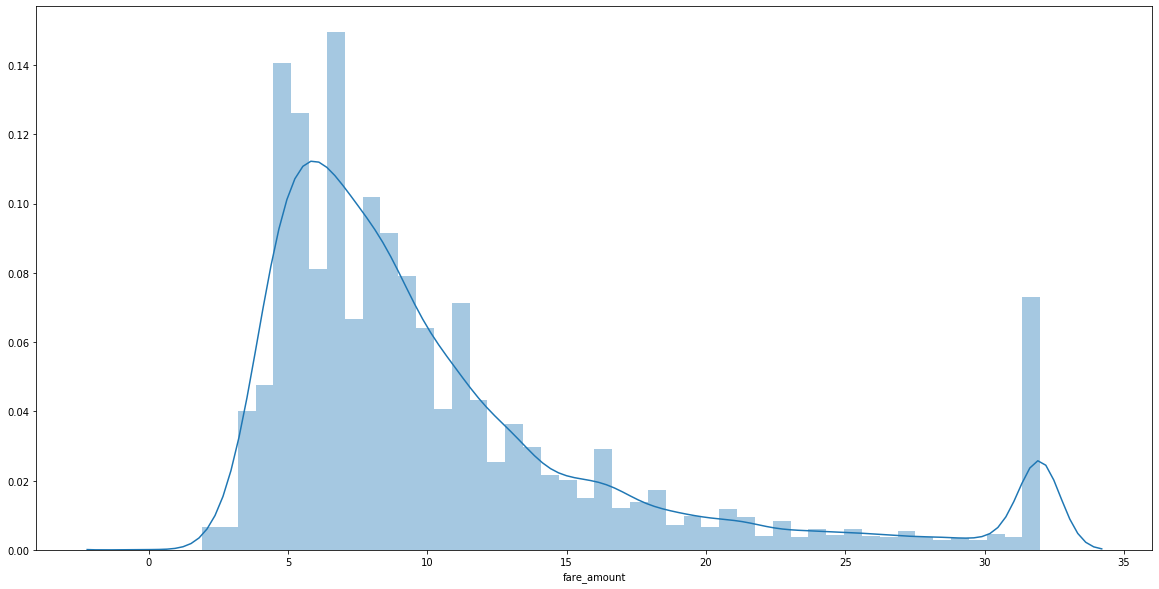

In [56]:
plt.figure(figsize=(20,10))
sns.distplot(y)

### Linear Regression

In [57]:
from sklearn.linear_model import LinearRegression

lin_reg=LinearRegression()
lin_reg.fit(X_train,y_train)

LinearRegression()

In [58]:
print('Coefficient of determination R^2 - on train set = {}'.format(lin_reg.score(X_train,y_train)))
print('Coefficient of determination R^2 - on test set = {}'.format(lin_reg.score(X_test,y_test)))

Coefficient of determination R^2 - on train set = 0.7518844746434654
Coefficient of determination R^2 - on test set = 0.7193224012152443


In [59]:
from sklearn.model_selection import cross_val_score
lin_score=cross_val_score(lin_reg,X,y,cv=10)

In [60]:
lin_score.mean()

0.7424330384503302

##### Model visualization for prediction pattern

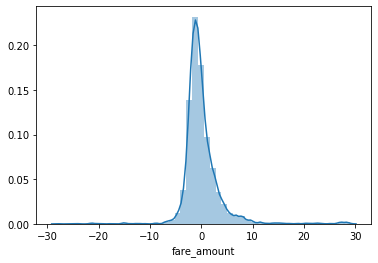

In [61]:
linear_regression_model=lin_reg.predict(X_test)
sns.distplot(y_test-linear_regression_model)

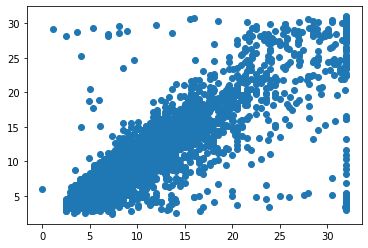

In [62]:
plt.scatter(y_test,linear_regression_model)

- The model has performed well as the Distribution now is Normal & points are scatter to form a linear line is visible

##### Evaluation Metrics

In [63]:
from sklearn import metrics
print('MAE : {}'.format(metrics.mean_absolute_error(y_test,linear_regression_model)))
print('MSE : {}'.format(metrics.mean_squared_error(y_test,linear_regression_model)))
print('RMSE : {}'.format(np.sqrt(metrics.mean_absolute_error(y_test,linear_regression_model))))

MAE : 2.165377139238211
MSE : 13.816731905057287
RMSE : 1.4715220485056317


##### Dumping file to pickle for Model deployment

In [64]:
import pickle

# #open a folder where pickle file to be stored
file = open('lin_reg_model.pkl','wb')

# # dum informations to that file
pickle.dump(linear_regression_model,file)

In [65]:
# Initially lets check best score occuring from Linear regression

linear_regression_model=LinearRegression()
mse=cross_val_score(lin_reg,X,y,scoring='neg_root_mean_squared_error',cv=5)
mean_mse=np.mean(mse)
print(mean_mse)

-3.581147977164347


### Ridge Regression

In [67]:
# Now let's see whether Ridge Regression performs better than Linear
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV

ridge_reg=Ridge()
ridge_score=cross_val_score(ridge_reg,X,y,cv=10)
print('Ridge score by CV              :{}'.format(ridge_score.mean()))

parameters={'alpha':[1e-15,1e-10,1e-8,1e-3,1e-2,1,5,10,20,30,35,40,45,50,100]}
ridge_regressor=GridSearchCV(ridge_reg,parameters,scoring='neg_root_mean_squared_error',cv=5)
ridge_regressor.fit(X,y)

print('Best parameter by GridSearchCV : {}'.format(ridge_regressor.best_params_))
print('Best score by Neg_RSME         : {}'.format(ridge_regressor.best_score_))

Ridge score by CV              :0.7424330590469321
Best parameter by GridSearchCV : {'alpha': 50}
Best score by Neg_RSME         : -3.5811334699139517


### Lasso Regression

In [68]:
# Let's check with Lasso Regression
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV

lasso_reg=Lasso()
lasso_score=cross_val_score(lasso_reg,X,y,cv=10)
print('Lasso score by CV              :{}'.format(lasso_score.mean()))

parameters={'alpha':[1e-15,1e-10,1e-8,1e-3,1e-2,1,5,10,20,30,35,40,45,50,55]}
lasso_regressor=GridSearchCV(lasso_reg,parameters,scoring='neg_root_mean_squared_error',cv=5)

lasso_regressor.fit(X,y)
print('Best parameter by GridSearchCV : {}'.format(lasso_regressor.best_params_))
print('Best score by Neg_RSME         : {}'.format(lasso_regressor.best_score_))

Lasso score by CV              :0.7327516901466671


C:\Users\kuldeep.sharma\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 20849.434953231117, tolerance: 64.04209227170551
  positive)
C:\Users\kuldeep.sharma\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 17543.285924987897, tolerance: 64.25761901735412
  positive)
C:\Users\kuldeep.sharma\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 47721.831187852564, tolerance: 63.730102461826256
  positive)


Best parameter by GridSearchCV : {'alpha': 1e-08}
Best score by Neg_RSME         : -3.5811479771432557


- There is no Noticeable Changes in the best score performend by Ridge & Lasso when compared with Linear Regression, we might get better results when used with hige dataset    (So,I'm not gonna dump these in pickle model)

### Decision Tree Classifier

In [69]:
from sklearn.tree import DecisionTreeRegressor

dtree=DecisionTreeRegressor()
dtree.fit(X_train,y_train)

DecisionTreeRegressor()

In [70]:
print("Coefficient of determination R^2 <-- on train set: {}".format(dtree.score(X_train, y_train)))
print("Coefficient of determination R^2 <-- on test set: {}".format(dtree.score(X_test, y_test)))

Coefficient of determination R^2 <-- on train set: 1.0
Coefficient of determination R^2 <-- on test set: 0.49050115243376147


In [71]:
from sklearn.model_selection import cross_val_score
score=cross_val_score(dtree,X,y,cv=10)
score.mean()

0.5160367044496865

##### Model visualization for prediction pattern

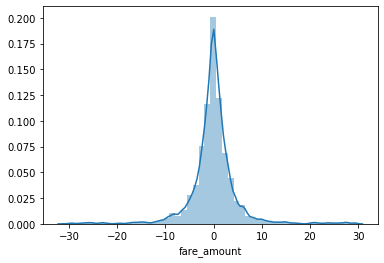

In [72]:
dtree_prediction=dtree.predict(X_test)
sns.distplot(y_test-dtree_prediction)

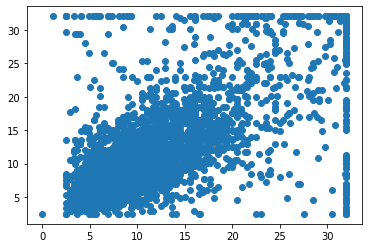

In [73]:
plt.scatter(y_test,dtree_prediction)

In [74]:
print('MAE:', metrics.mean_absolute_error(y_test, dtree_prediction))
print('MSE:', metrics.mean_squared_error(y_test, dtree_prediction))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, dtree_prediction)))

MAE: 2.9088574989613627
MSE: 25.080765309513914
RMSE: 5.008070018431643


##### Hyperparameter Tuning for DecisionTreeRegressor

In [75]:
params={
 "splitter"    : ["best","random"] ,
 "max_depth"        : [ 3, 4, 5, 6, 8, 10, 12, 15],
 "min_samples_leaf" : [ 1,2,3],
"min_weight_fraction_leaf":[0.1,0.2],
 "max_features" : ["auto","log2","sqrt",None ],
    "max_leaf_nodes":[30,40,50,60,70]
    }

In [76]:
from sklearn.model_selection import GridSearchCV
grid_search_dtree=GridSearchCV(dtree,param_grid=params,scoring='neg_root_mean_squared_error',n_jobs=-1,cv=5,verbose=3)

In [77]:
grid_search_dtree.fit(X,y)

Fitting 5 folds for each of 1920 candidates, totalling 9600 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  24 tasks      | elapsed:    5.5s
[Parallel(n_jobs=-1)]: Done 356 tasks      | elapsed:    8.0s
[Parallel(n_jobs=-1)]: Done 1636 tasks      | elapsed:   17.2s
[Parallel(n_jobs=-1)]: Done 3428 tasks      | elapsed:   27.7s
[Parallel(n_jobs=-1)]: Done 5732 tasks      | elapsed:   42.6s
[Parallel(n_jobs=-1)]: Done 8548 tasks      | elapsed:  1.0min
[Parallel(n_jobs=-1)]: Done 9600 out of 9600 | elapsed:  1.2min finished


GridSearchCV(cv=5, estimator=DecisionTreeRegressor(), n_jobs=-1,
             param_grid={'max_depth': [3, 4, 5, 6, 8, 10, 12, 15],
                         'max_features': ['auto', 'log2', 'sqrt', None],
                         'max_leaf_nodes': [30, 40, 50, 60, 70],
                         'min_samples_leaf': [1, 2, 3],
                         'min_weight_fraction_leaf': [0.1, 0.2],
                         'splitter': ['best', 'random']},
             scoring='neg_root_mean_squared_error', verbose=3)

In [78]:
print(grid_search_dtree.best_params_)
print(grid_search_dtree.best_score_)

{'max_depth': 5, 'max_features': 'auto', 'max_leaf_nodes': 30, 'min_samples_leaf': 1, 'min_weight_fraction_leaf': 0.1, 'splitter': 'best'}
-4.0718292988961355


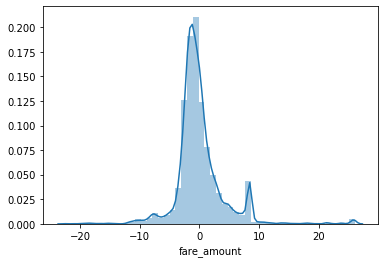

In [79]:
dtree_predictions=grid_search_dtree.predict(X_test)
sns.distplot(y_test-dtree_predictions)

##### Evaluation Metrics.

In [80]:
print('MAE:', metrics.mean_absolute_error(y_test, dtree_predictions))
print('MSE:', metrics.mean_squared_error(y_test, dtree_predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, dtree_predictions)))

MAE: 2.6129183087760843
MSE: 17.2247800063998
RMSE: 4.150274690475294


- Decision tree has not performed better than Linear regession

##### Dumping file to pickle for Model deployment

In [82]:
# # open a file, where you ant to store the data
file = open('decision_regression_model.pkl', 'wb')

# # dump information to that file
pickle.dump(grid_search_dtree, file)

### RandomForest Regression

In [83]:
from sklearn.ensemble import RandomForestRegressor
rf_reg=RandomForestRegressor()
rf_reg.fit(X,y)

RandomForestRegressor()

In [84]:
print("Coefficient of determination R^2 <-- on train set: {}".format(rf_reg.score(X_train, y_train)))
print("Coefficient of determination R^2 <-- on test set: {}".format(rf_reg.score(X_test, y_test)))

Coefficient of determination R^2 <-- on train set: 0.9679346842635216
Coefficient of determination R^2 <-- on test set: 0.9652402426901895


In [85]:
from sklearn.model_selection import cross_val_score
rf_score=cross_val_score(rf_reg,X,y,cv=5)
rf_score.mean()

0.7607915984038529

##### Model visualization for prediction pattern

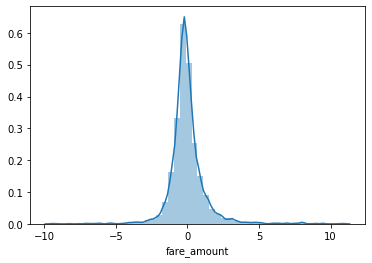

In [86]:
rf_prediction=rf_reg.predict(X_test)
sns.distplot(y_test-rf_prediction)

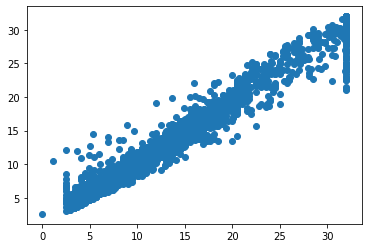

In [87]:
plt.scatter(y_test,rf_prediction)

In [88]:
print('MAE:', metrics.mean_absolute_error(y_test, rf_prediction))
print('MSE:', metrics.mean_squared_error(y_test, rf_prediction))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, rf_prediction)))

MAE: 0.783073680930619
MSE: 1.7110957551080188
RMSE: 1.3080885884021842


In [89]:
from sklearn.model_selection import RandomizedSearchCV
n_estimators = [int(x) for x in np.linspace(start = 100, stop = 1200, num = 12)]
print(n_estimators)

[100, 200, 300, 400, 500, 600, 700, 800, 900, 1000, 1100, 1200]


In [90]:
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 100, stop = 1200, num = 12)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(5, 30, num = 6)]
# max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10, 15, 100]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 5, 10]
# Method of selecting samples for training each tree
bootstrap = [True, False]

# Create the random grid
rf_random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf}

print(rf_random_grid)

{'n_estimators': [100, 200, 300, 400, 500, 600, 700, 800, 900, 1000, 1100, 1200], 'max_features': ['auto', 'sqrt'], 'max_depth': [5, 10, 15, 20, 25, 30], 'min_samples_split': [2, 5, 10, 15, 100], 'min_samples_leaf': [1, 2, 5, 10]}


In [91]:
rf_random = RandomizedSearchCV(estimator = rf_reg, param_distributions = rf_random_grid,scoring='neg_root_mean_squared_error', n_iter = 10, cv = 5, verbose=2, random_state=42, n_jobs = 1)

In [92]:
rf_random.fit(X_train,y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10 


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10, total=   6.2s
[CV] n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10 


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    6.1s remaining:    0.0s


[CV]  n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10, total=   5.5s
[CV] n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10 
[CV]  n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10, total=   5.4s
[CV] n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10 
[CV]  n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10, total=   5.5s
[CV] n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10 
[CV]  n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10, total=   5.5s
[CV] n_estimators=1100, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=15 
[CV]  n_estimators=1100, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=15, total=   8.8s
[CV] n_estimators=1100, min_samples_split=10, mi

[CV]  n_estimators=700, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=5, total=   2.5s
[CV] n_estimators=700, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=5 
[CV]  n_estimators=700, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=5, total=   2.6s
[CV] n_estimators=700, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=5 
[CV]  n_estimators=700, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=5, total=   2.6s
[CV] n_estimators=700, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=5 
[CV]  n_estimators=700, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=5, total=   2.5s
[CV] n_estimators=700, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=5 
[CV]  n_estimators=700, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=5, total=   2.5s
[CV] n_estimators=700, min_samples_split=15, min_sam

[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed:  6.5min finished


RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(), n_jobs=1,
                   param_distributions={'max_depth': [5, 10, 15, 20, 25, 30],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 5, 10],
                                        'min_samples_split': [2, 5, 10, 15,
                                                              100],
                                        'n_estimators': [100, 200, 300, 400,
                                                         500, 600, 700, 800,
                                                         900, 1000, 1100,
                                                         1200]},
                   random_state=42, scoring='neg_root_mean_squared_error',
                   verbose=2)

In [93]:
print(rf_random.best_params_)
print(rf_random.best_score_)

{'n_estimators': 300, 'min_samples_split': 100, 'min_samples_leaf': 5, 'max_features': 'auto', 'max_depth': 15}
-3.307444713923909


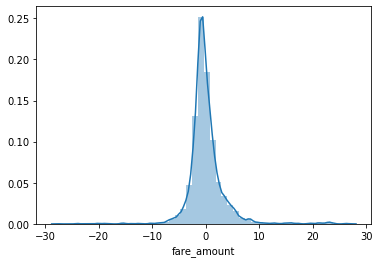

In [94]:
rf_predictions=rf_random.predict(X_test)
sns.distplot(y_test-rf_predictions)

##### Evaluation Metrics

In [95]:
print('MAE :', metrics.mean_absolute_error(y_test, rf_predictions))
print('MSE :', metrics.mean_squared_error(y_test, rf_predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, rf_predictions)))

MAE : 2.0205741207396297
MSE : 11.710156143319137
RMSE: 3.4220105410882558


##### Dumping file to pickle for Model deployment

In [96]:
# # open a file, where you ant to store the data
file = open('random_forest_regression_model.pkl', 'wb')

# # dump information to that file
pickle.dump(rf_random, file)

#### XGBoost

In [97]:
import xgboost as xgb
xgb_regressor=xgb.XGBRegressor()
xgb_regressor.fit(X_train,y_train)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.300000012, max_delta_step=0, max_depth=6,
             min_child_weight=1, missing=nan, monotone_constraints='()',
             n_estimators=100, n_jobs=0, num_parallel_tree=1, random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
             tree_method='exact', validate_parameters=1, verbosity=None)

In [98]:
print("Coefficient of determination R^2 <-- on train set: {}".format(xgb_regressor.score(X_train, y_train)))
print("Coefficient of determination R^2 <-- on test set: {}".format(xgb_regressor.score(X_test, y_test)))

Coefficient of determination R^2 <-- on train set: 0.9304012591524806
Coefficient of determination R^2 <-- on test set: 0.7374368920576674


In [99]:
from sklearn.model_selection import cross_val_score
xgb_score=cross_val_score(xgb_regressor,X,y,cv=5)
xgb_score.mean()

0.7552525126745274

##### Model visualization for prediction pattern

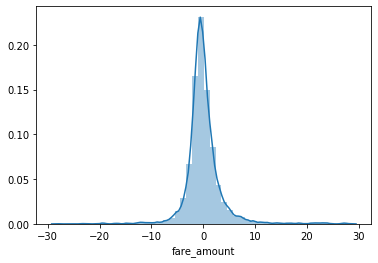

In [100]:
xgb_prediction=xgb_regressor.predict(X_test)
sns.distplot(y_test-xgb_prediction)

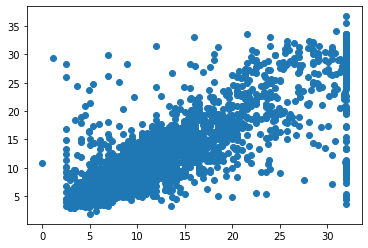

In [101]:
plt.scatter(y_test,xgb_prediction)

##### Evaluation Metrics

In [102]:
print('MAE:', metrics.mean_absolute_error(y_test, xgb_prediction))
print('MSE:', metrics.mean_squared_error(y_test, xgb_prediction))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, xgb_prediction)))

MAE: 2.1123200269224833
MSE: 12.925021755583224
RMSE: 3.595138628145405


In [103]:
xgb.XGBRegressor()

XGBRegressor(base_score=None, booster=None, colsample_bylevel=None,
             colsample_bynode=None, colsample_bytree=None, gamma=None,
             gpu_id=None, importance_type='gain', interaction_constraints=None,
             learning_rate=None, max_delta_step=None, max_depth=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=100, n_jobs=None, num_parallel_tree=None,
             random_state=None, reg_alpha=None, reg_lambda=None,
             scale_pos_weight=None, subsample=None, tree_method=None,
             validate_parameters=None, verbosity=None)

In [104]:
# Parameters
n_estimators = [int(x) for x in np.linspace(start = 100, stop = 1200, num = 12)]
# Various learning rate parameters
learning_rate = ['0.05','0.1', '0.2','0.3','0.5','0.6']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(5, 30, num = 6)]
# max_depth.append(None)
#Subssample parameter values
subsample=[0.7,0.6,0.8]
# Minimum child weight parameters
min_child_weight=[3,4,5,6,7]

# Creating the random grid
xgb_random_grid = {'n_estimators': n_estimators,
               'learning_rate': learning_rate,
               'max_depth': max_depth,
               'subsample': subsample,
               'min_child_weight': min_child_weight}

print(xgb_random_grid)

{'n_estimators': [100, 200, 300, 400, 500, 600, 700, 800, 900, 1000, 1100, 1200], 'learning_rate': ['0.05', '0.1', '0.2', '0.3', '0.5', '0.6'], 'max_depth': [5, 10, 15, 20, 25, 30], 'subsample': [0.7, 0.6, 0.8], 'min_child_weight': [3, 4, 5, 6, 7]}


In [105]:
xg_random = RandomizedSearchCV(estimator = xgb_regressor, param_distributions = xgb_random_grid,scoring='neg_root_mean_squared_error', n_iter = 10, cv = 5, verbose=2, random_state=42, n_jobs = 1)

In [106]:
xg_random.fit(X_train,y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] subsample=0.8, n_estimators=1100, min_child_weight=6, max_depth=25, learning_rate=0.05 


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  subsample=0.8, n_estimators=1100, min_child_weight=6, max_depth=25, learning_rate=0.05, total=  32.1s
[CV] subsample=0.8, n_estimators=1100, min_child_weight=6, max_depth=25, learning_rate=0.05 


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:   32.0s remaining:    0.0s


[CV]  subsample=0.8, n_estimators=1100, min_child_weight=6, max_depth=25, learning_rate=0.05, total=  29.5s
[CV] subsample=0.8, n_estimators=1100, min_child_weight=6, max_depth=25, learning_rate=0.05 
[CV]  subsample=0.8, n_estimators=1100, min_child_weight=6, max_depth=25, learning_rate=0.05, total=  28.7s
[CV] subsample=0.8, n_estimators=1100, min_child_weight=6, max_depth=25, learning_rate=0.05 
[CV]  subsample=0.8, n_estimators=1100, min_child_weight=6, max_depth=25, learning_rate=0.05, total=  31.8s
[CV] subsample=0.8, n_estimators=1100, min_child_weight=6, max_depth=25, learning_rate=0.05 
[CV]  subsample=0.8, n_estimators=1100, min_child_weight=6, max_depth=25, learning_rate=0.05, total=  31.4s
[CV] subsample=0.8, n_estimators=900, min_child_weight=7, max_depth=30, learning_rate=0.5 
[CV]  subsample=0.8, n_estimators=900, min_child_weight=7, max_depth=30, learning_rate=0.5, total=   8.2s
[CV] subsample=0.8, n_estimators=900, min_child_weight=7, max_depth=30, learning_rate=0.5 
[

[CV]  subsample=0.6, n_estimators=1200, min_child_weight=5, max_depth=15, learning_rate=0.05, total=  22.7s
[CV] subsample=0.6, n_estimators=1200, min_child_weight=5, max_depth=15, learning_rate=0.05 
[CV]  subsample=0.6, n_estimators=1200, min_child_weight=5, max_depth=15, learning_rate=0.05, total=  24.4s
[CV] subsample=0.7, n_estimators=300, min_child_weight=6, max_depth=30, learning_rate=0.5 
[CV]  subsample=0.7, n_estimators=300, min_child_weight=6, max_depth=30, learning_rate=0.5, total=   6.9s
[CV] subsample=0.7, n_estimators=300, min_child_weight=6, max_depth=30, learning_rate=0.5 
[CV]  subsample=0.7, n_estimators=300, min_child_weight=6, max_depth=30, learning_rate=0.5, total=   6.7s
[CV] subsample=0.7, n_estimators=300, min_child_weight=6, max_depth=30, learning_rate=0.5 
[CV]  subsample=0.7, n_estimators=300, min_child_weight=6, max_depth=30, learning_rate=0.5, total=   6.5s
[CV] subsample=0.7, n_estimators=300, min_child_weight=6, max_depth=30, learning_rate=0.5 
[CV]  sub

[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed: 10.0min finished


RandomizedSearchCV(cv=5,
                   estimator=XGBRegressor(base_score=0.5, booster='gbtree',
                                          colsample_bylevel=1,
                                          colsample_bynode=1,
                                          colsample_bytree=1, gamma=0,
                                          gpu_id=-1, importance_type='gain',
                                          interaction_constraints='',
                                          learning_rate=0.300000012,
                                          max_delta_step=0, max_depth=6,
                                          min_child_weight=1, missing=nan,
                                          monotone_constraints='()',
                                          n_estimators=100, n_jobs=0,
                                          num_par...
                                          tree_method='exact',
                                          validate_parameters=1,
                   

In [107]:
print(xg_random.best_params_)
print(xg_random.best_score_)

{'subsample': 0.8, 'n_estimators': 1100, 'min_child_weight': 6, 'max_depth': 25, 'learning_rate': '0.05'}
-3.6252214480452567


In [108]:
xgb_predictions=xg_random.predict(X_test)

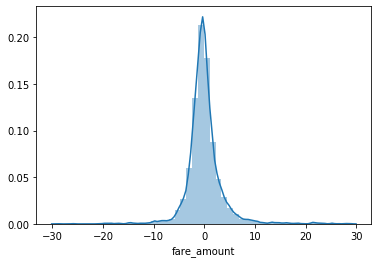

In [109]:
sns.distplot(y_test-xgb_predictions)

##### Evaluation Metrics

In [110]:
print('MAE:', metrics.mean_absolute_error(y_test, xgb_predictions))
print('MSE:', metrics.mean_squared_error(y_test, xgb_predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, xgb_predictions)))

MAE: 2.1862142738624386
MSE: 13.271486941992778
RMSE: 3.6430052075165604


##### Dumping file to pickle for Model deployment

In [111]:
# # open a file, where you ant to store the data
file = open('xg_boost model.pkl', 'wb')

# # dump information to that file
pickle.dump(xg_random, file)

## Best Model for prediction

### Model Scores

1. Linear Regression         :   0.7424330384503302
2. Ridge Regression          :   0.7424330590469321
3. Lasso Regression          :   0.7327516901466671
4. Decision Trees Regression :   0.5205541179521329
5. Random Forest Regression  :   **0.7617557962178525**
6. XgBoost Regression        :   0.7552525126745274

It is clear that ***Random Forest Regression*** is Best Performing Model

### Negative RSME from cross validation

1. Linear Regression         :   -3.581147977164347
2. Ridge Regression          :   -3.5811334699139517
3. Lasso Regression          :   -3.5811479771432557
4. Decision Trees Regression :   -4.0718292988961355
5. Random Forest Regression  :   **-3.3087780047498954**
6. XgBoost Regression        :   -3.6252214480452567

It is clear that here too ***RandomForest Regression*** is best performing Model

Therefore, Performing Random Forest Regression on the Test DataSet with feature engineering is as follows

In [112]:
df_test.head()

,passenger_count,year,month,day,hour,minute,shift,total_distance
0,1,2015,1,27,13,8,1,2.323259
1,1,2015,1,27,13,8,1,2.425353
2,1,2011,10,8,11,53,0,0.618628
3,1,2012,12,1,21,12,1,1.961033
4,1,2012,12,1,21,12,1,5.387301


## Prediction for Test Data Set

In [113]:
df_test['fare_amount_predicted'] = rf_random.predict(df_test)

In [114]:
df_test.head()

,passenger_count,year,month,day,hour,minute,shift,total_distance,fare_amount_predicted
0,1,2015,1,27,13,8,1,2.323259,9.932267
1,1,2015,1,27,13,8,1,2.425353,10.579741
2,1,2011,10,8,11,53,0,0.618628,4.415271
3,1,2012,12,1,21,12,1,1.961033,8.376485
4,1,2012,12,1,21,12,1,5.387301,14.846051


In [115]:
df_test.fare_amount_predicted.describe()

count    9914.000000
mean       10.765142
std         6.221906
min         4.139986
25%         6.483124
50%         8.650002
75%        12.418991
max        31.614417
Name: fare_amount_predicted, dtype: float64

### Exporting the CSV as predicted_cab_fare

In [116]:
df_test.to_csv('predicted_cab_fare.csv',index=False)

In [66]:
# df.to_csv('train_data.csv',index=False)